In [ ]:
import gdown
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
url = 'https://drive.google.com/uc?id=19QkF8i1my99gjbyHe7de_qZNwgrca6R5'
output = 'bangkok_traffy.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=19QkF8i1my99gjbyHe7de_qZNwgrca6R5
From (redirected): https://drive.google.com/uc?id=19QkF8i1my99gjbyHe7de_qZNwgrca6R5&confirm=t&uuid=4b6b6a4e-739c-47c9-b869-bc6caf534bca
To: /content/bangkok_traffy.csv
100%|██████████| 1.07G/1.07G [00:10<00:00, 103MB/s]


'bangkok_traffy.csv'

In [ ]:
df = pd.read_csv(output)
df

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
0,2021-FYJTFP,{ความสะอาด},เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53084,13.81865",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00,เสร็จสิ้น,NaN,0,2022-06-04 15:34:14.609206+00
1,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}","เขตประเวศ,ฝ่ายโยธา เขตประเวศ",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.66709,13.67891",189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเว...,หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00,เสร็จสิ้น,4.0,0,2022-06-21 08:21:09.532782+00
2,2021-7XATFA,{สะพาน},เขตสาทร,สะพานลอยปรับปรุงไม่เสร็จตามกำหนด\nปากซอย สาทร12,https://storage.googleapis.com/traffy_public_b...,NaN,"100.52649,13.72060",191/1 ถนน สาทรเหนือ แขวง สีลม เขตบางรัก กรุงเท...,ยานนาวา,สาทร,กรุงเทพมหานคร,2021-09-26 05:03:52.594898+00,เสร็จสิ้น,NaN,0,2022-06-06 01:17:12.272904+00
3,2021-9U2NJT,{น้ำท่วม},"เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ",น้ำท่วม,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.53099,13.81853",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-10-14 10:45:27.713884+00,เสร็จสิ้น,NaN,0,2022-09-08 08:35:43.784519+00
4,2021-DVEWYM,"{น้ำท่วม,ถนน}","เขตลาดพร้าว,ฝ่ายโยธา เขตลาดพร้าว",ซอยลาดพร้าววังหิน 75 ถนนลาดพร้าววังหิน แขวงลาด...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.59165,13.82280",702 ถ. ลาดพร้าววังหิน แขวงลาดพร้าว เขตลาดพร้าว...,ลาดพร้าว,ลาดพร้าว,กรุงเทพมหานคร,2021-12-09 12:29:08.408763+00,เสร็จสิ้น,5.0,0,2022-08-12 07:18:44.884945+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787021,KDDNBP,{ร้องเรียน},เขตหนองจอก,ศูนย์เรื่องราวร้องทุกข์ ได้รับการประสานผ่านระบ...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.86304,13.85633",เขตหนองจอก กรุงเทพมหานคร : VV47+G6M แขวงกระทุ่...,กระทุ่มราย,หนองจอก,กรุงเทพมหานคร,2025-01-16 02:50:24.112172+00,กำลังดำเนินการ,NaN,0,2025-01-16 02:50:26.781334+00
787022,RYM99G,"{ความสะอาด,ถนน}","เขตคลองสาน,ฝ่ายสิ่งแวดล้อมฯ เขตคลองสาน",ปัญหา: บริเวณตลาดพระเครื่องพญาไม้ พบร้านอาหารต...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.49651,13.73469",39 ถ. สมเด็จเจ้าพระยา แขวงสมเด็จเจ้าพระยา เขตค...,สมเด็จเจ้าพระยา,คลองสาน,กรุงเทพมหานคร,2025-01-16 02:51:28.8957+00,กำลังดำเนินการ,NaN,0,2025-01-16 02:53:23.119455+00
787023,2025-BDQ87Y,"{ร้องเรียน,ต้นไม้,ความปลอดภัย}",เขตราชเทวี,ต้นไม้บริเวณดังกล่าวช่วงโคนต้นไม้มันแห้งเหมือน...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53975,13.76426",10 ถ. ราชวิถี แขวงถนนพญาไท เขตราชเทวี กรุงเทพม...,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,2025-01-16 02:52:33.878797+00,รอรับเรื่อง,NaN,0,2025-01-16 02:52:38.17364+00
787024,EZCZZU,{ถนน},เขตจอมทอง,ปัญหา: พบโรงกลึง (ไม่ทราบชื่อ) ทำงานบนพื้นผิวจ...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.46226,13.67672",123 แขวงบางมด เขตจอมทอง กรุงเทพมหานคร 10150 ปร...,บางมด,จอมทอง,กรุงเทพมหานคร,2025-01-16 02:53:27.583947+00,กำลังดำเนินการ,NaN,0,2025-01-16 02:53:30.250517+00


In [ ]:
df.shape

(787026, 16)

In [ ]:
# Drop unused columns
cols_to_drop = [
    'photo', 'photo_after', 'address', 'province',
    'star', 'last_activity', 'organization', 'coords',
    'state'
]

df = df.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
# Split Type to List
df['type'] = (
    df['type']
    .astype(str)
    .str.replace('{','')
    .str.replace('}','')
    .str.split(',')
)

# Remove empty strings, nan, whitespace
df['type'] = df['type'].apply(
    lambda lst: [t.strip() for t in lst if t.strip() not in ['', 'nan']]
)


In [ ]:
# Remove unused Type
unused = ['การเดินทาง', 'เสนอแนะ', 'คนจรจัด',
          'ห้องน้ำ', 'ป้ายจราจร', 'สอบถาม', 'ป้าย']

df['type'] = df['type'].apply(
    lambda lst: [t for t in lst if t not in unused]
)


In [ ]:
# Drop rows where type becomes empty
df = df[df['type'].apply(lambda x: len(x) > 0)]


In [ ]:
df.shape

(649487, 7)

In [ ]:
# Drop missing comment
df = df[df['comment'].notna()]
df['comment'] = df['comment'].astype(str).str.strip()

# Drop empty comment
df = df[df['comment'] != ""]

In [ ]:
df.shape

(643630, 7)

In [ ]:
# Handle missing subdistrict / district
df['subdistrict'] = df['subdistrict'].fillna("Unknown")
df['district'] = df['district'].fillna("Unknown")

In [ ]:
# Standardize timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop invalid timestamp
df = df[df['timestamp'].notna()]

In [ ]:
cleaned_df = df.reset_index(drop=True)

cleaned_df.info()
cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643629 entries, 0 to 643628
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ticket_id     643629 non-null  object             
 1   type          643629 non-null  object             
 2   comment       643629 non-null  object             
 3   subdistrict   643629 non-null  object             
 4   district      643629 non-null  object             
 5   timestamp     643629 non-null  datetime64[ns, UTC]
 6   count_reopen  643629 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 34.4+ MB


,ticket_id,type,comment,subdistrict,district,timestamp,count_reopen
0,2021-FYJTFP,[ความสะอาด],ขยะเยอะ,Unknown,Unknown,2021-09-03 12:51:09.453003+00:00,0
1,2021-CGPMUN,"[น้ำท่วม, ร้องเรียน]",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,หนองบอน,ประเวศ,2021-09-19 14:56:08.924992+00:00,0
2,2021-7XATFA,[สะพาน],สะพานลอยปรับปรุงไม่เสร็จตามกำหนด\nปากซอย สาทร12,ยานนาวา,สาทร,2021-09-26 05:03:52.594898+00:00,0
3,2021-9U2NJT,[น้ำท่วม],น้ำท่วม,Unknown,Unknown,2021-10-14 10:45:27.713884+00:00,0
4,2021-DVEWYM,"[น้ำท่วม, ถนน]",ซอยลาดพร้าววังหิน 75 ถนนลาดพร้าววังหิน แขวงลาด...,ลาดพร้าว,ลาดพร้าว,2021-12-09 12:29:08.408763+00:00,0


In [ ]:
# Check is null
cleaned_df.isna().sum()


,0
ticket_id,0
type,0
comment,0
subdistrict,0
district,0
timestamp,0
count_reopen,0


In [ ]:
# View Type
cleaned_df_exploded = cleaned_df.explode('type')
cleaned_df_exploded['type'].value_counts()


,count
type,
ถนน,255020
ทางเท้า,107127
ความปลอดภัย,81157
แสงสว่าง,72857
ความสะอาด,66940
กีดขวาง,66096
ร้องเรียน,49525
จราจร,46145
ท่อระบายน้ำ,42638


In [ ]:
cleaned_df['year'] = cleaned_df['timestamp'].dt.year
cleaned_df['year'].value_counts().sort_index()


,count
year,
2021,8
2022,134258
2023,237209
2024,261284
2025,10870


In [ ]:
percentiles = [0.90, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999]
cleaned_df['count_reopen'].quantile(percentiles)

,count_reopen
0.900,0.0
0.950,1.0
0.970,1.0
0.980,1.0
0.990,2.0
0.995,4.0
0.999,10.0


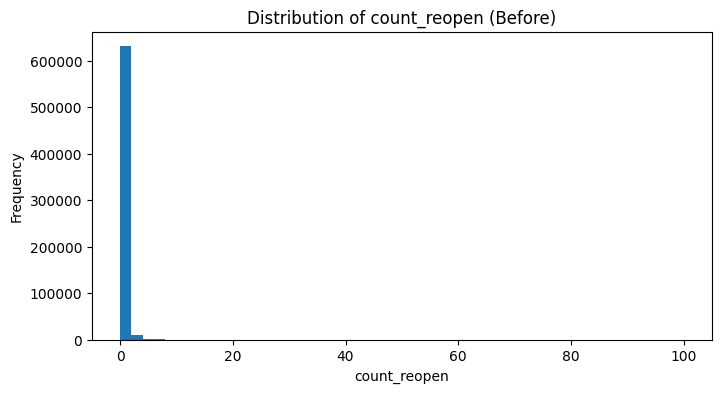

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(cleaned_df['count_reopen'], bins=50)
plt.title("Distribution of count_reopen (Before)")
plt.xlabel("count_reopen")
plt.ylabel("Frequency")
plt.show()

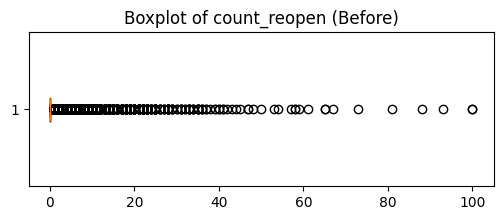

In [ ]:
plt.figure(figsize=(6,2))
plt.boxplot(cleaned_df['count_reopen'], vert=False)
plt.title("Boxplot of count_reopen (Before)")
plt.show()

In [ ]:
cleaned_df['count_reopen_log'] = np.log1p(cleaned_df['count_reopen'])


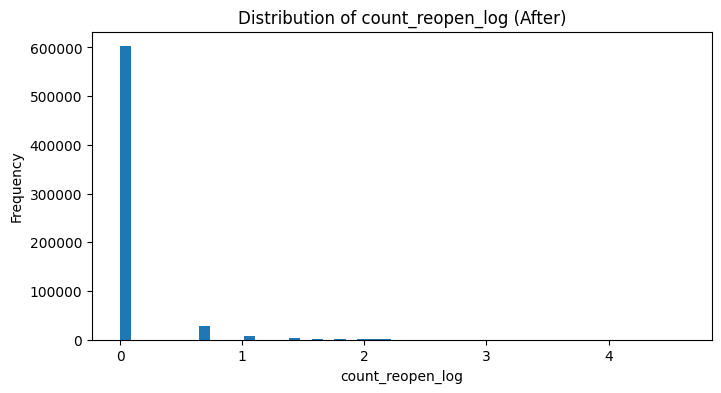

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(cleaned_df['count_reopen_log'], bins=50)
plt.title("Distribution of count_reopen_log (After)")
plt.xlabel("count_reopen_log")
plt.ylabel("Frequency")
plt.show()

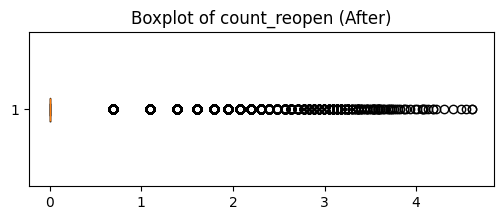

In [ ]:
plt.figure(figsize=(6,2))
plt.boxplot(cleaned_df['count_reopen_log'], vert=False)
plt.title("Boxplot of count_reopen (After)")
plt.show()

In [ ]:
percentiles = [0.90, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999]
cleaned_df['count_reopen'].quantile(percentiles)

,count_reopen
0.900,0.0
0.950,1.0
0.970,1.0
0.980,1.0
0.990,2.0
0.995,4.0
0.999,10.0


In [ ]:
print(cleaned_df['count_reopen'].skew())
print(cleaned_df['count_reopen_log'].skew())

32.44250671428487
5.310567487083981
